In [5]:
import pandas as pd
import numpy as np
import tables as tb
import os
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider
import ipywidgets as widgets
import sys
from datetime import datetime
from scipy.optimize import curve_fit

In [7]:
data_properties_13850 = pd.read_hdf(f"../data/analysis/Run_13850_Filtered.h5", "data_properties")
data_properties_13859 = pd.read_hdf(f"../data/analysis/Run_13859_Filtered.h5", "data_properties")
data_properties_14180 = pd.read_hdf(f"../data/analysis/Run_14180_Filtered.h5", "data_properties")
data_properties_14498 = pd.read_hdf(f"../data/analysis/Run_14498_Filtered.h5", "data_properties")

/var/folders/tr/r0bv1gl52_vb7v8bswkb_z0nb301gc/T/ipykernel_68539/2797804976.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('Dark2', 8)


Text(0.5, 1.0, 'Cathode Events')

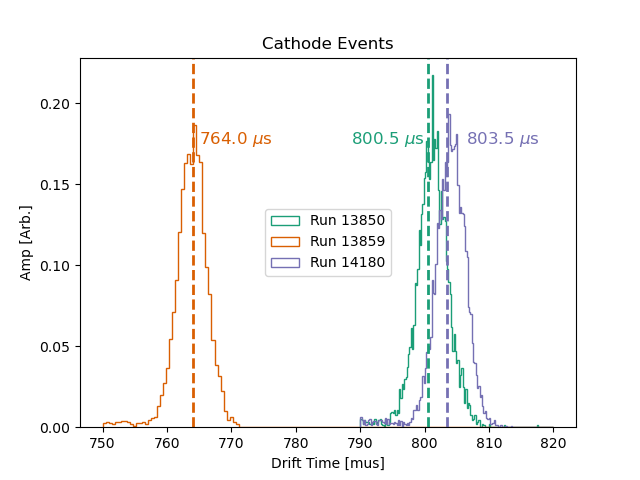

In [36]:
%matplotlib widget
plt.figure()

colors = plt.cm.get_cmap('Dark2', 8)

plt.hist(data_properties_13850.deltaT, bins = np.linspace(790, 820, 150), histtype = "step" ,color = colors(0), label = "Run 13850", density=True);
plt.hist(data_properties_13859.deltaT, bins = np.linspace(750, 820, 150), histtype = "step" ,color = colors(1), label = "Run 13859", density=True);
plt.hist(data_properties_14180.deltaT, bins = np.linspace(790, 820, 150), histtype = "step" ,color = colors(2), label = "Run 14180", density=True);
plt.xlabel("Drift Time [mus]")
plt.ylabel("Amp [Arb.]")
plt.legend()
# plt.xlim("790,")

plt.axvline(800.5, linestyle = "--", color = colors(0), linewidth = 2)
plt.axvline(764, linestyle = "--", color = colors(1), linewidth = 2)
plt.axvline(803.5, linestyle = "--", color = colors(2), linewidth = 2)

plt.text(788.5, 0.175, r'800.5 $\mu$s', fontsize=12, color = colors(0))
plt.text(765.0, 0.175, r'764.0 $\mu$s', fontsize=12, color = colors(1))
plt.text(806.5, 0.175, r'803.5 $\mu$s', fontsize=12, color = colors(2))
plt.title("Cathode Events")

/var/folders/tr/r0bv1gl52_vb7v8bswkb_z0nb301gc/T/ipykernel_68539/2017932484.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('Dark2', 8)


Text(0.5, 1.0, 'Cathode Events')

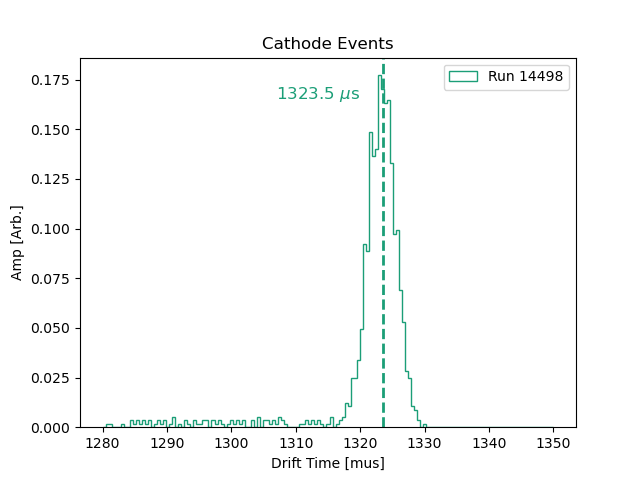

In [49]:
%matplotlib widget
plt.figure()

colors = plt.cm.get_cmap('Dark2', 8)

plt.hist(data_properties_14498.deltaT, bins = np.linspace(1280, 1350, 150), histtype = "step" ,color = colors(0), label = "Run 14498", density=True);
plt.xlabel("Drift Time [mus]")
plt.ylabel("Amp [Arb.]")
plt.legend()
# plt.xlim("790,")

plt.axvline(1323.5, linestyle = "--", color = colors(0), linewidth = 2)
plt.text(1307, 0.165, r'1323.5 $\mu$s', fontsize=12, color = colors(0))
plt.title("Cathode Events")

/var/folders/tr/r0bv1gl52_vb7v8bswkb_z0nb301gc/T/ipykernel_68539/3157148370.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('Dark2', 8)


Text(0.5, 1.0, 'Active Events')

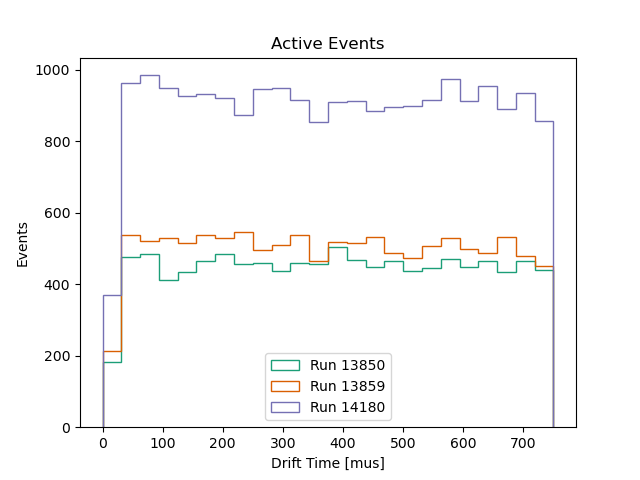

In [34]:
%matplotlib widget
plt.figure()

colors = plt.cm.get_cmap('Dark2', 8)

plt.hist(data_properties_13850.deltaT, bins = np.linspace(0, 750, 25), histtype = "step" ,color = colors(0), label = "Run 13850", density=False);
plt.hist(data_properties_13859.deltaT, bins = np.linspace(0, 750, 25), histtype = "step" ,color = colors(1), label = "Run 13859", density=False);
plt.hist(data_properties_14180.deltaT, bins = np.linspace(0, 750, 25), histtype = "step" ,color = colors(2), label = "Run 14180", density=False);
plt.xlabel("Drift Time [mus]")
plt.ylabel("Events")
plt.legend()
# plt.xlim("790,")
plt.title("Active Events")

/var/folders/tr/r0bv1gl52_vb7v8bswkb_z0nb301gc/T/ipykernel_68539/191899873.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('Dark2', 8)


Text(0.5, 1.0, 'Active Events')

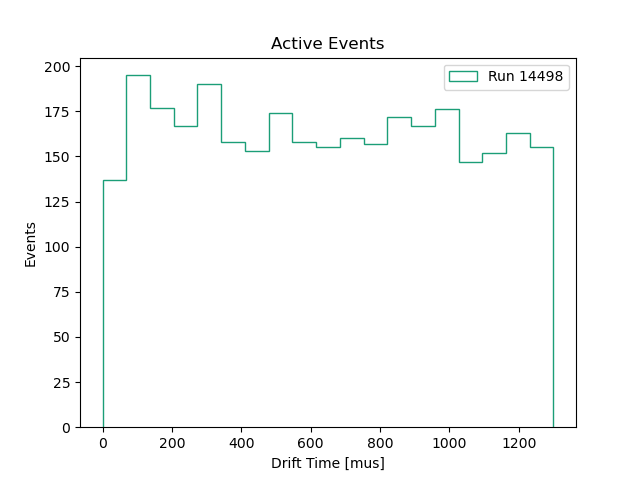

In [51]:
%matplotlib widget
plt.figure()

colors = plt.cm.get_cmap('Dark2', 8)

plt.hist(data_properties_14498.deltaT, bins = np.linspace(0, 1300, 20), histtype = "step" ,color = colors(0), label = "Run 14498", density=False);
plt.xlabel("Drift Time [mus]")
plt.ylabel("Events")
plt.legend()
# plt.xlim("790,")
plt.title("Active Events")

Mean LT Run 13850: 9.001174208233644 3.5740265062497607
Mean LT Run 14180: 9.019293403127289 1.481882467964567
Mean q0 Run 13850: 3.5511701862995766 0.2838082761588233
Mean q0 Run 14180: 3.653106732670235 0.3150839551834278


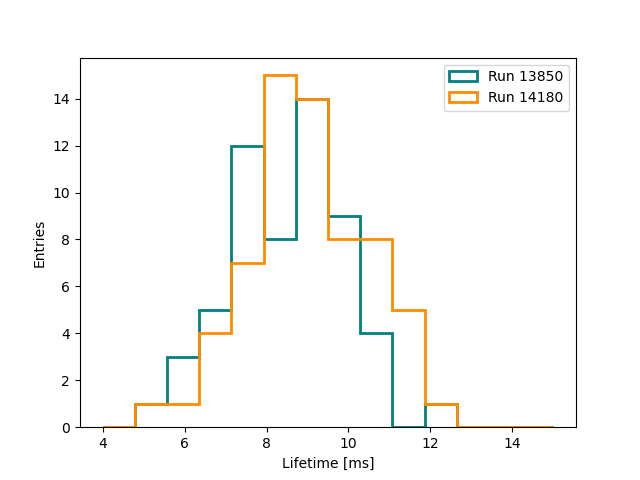

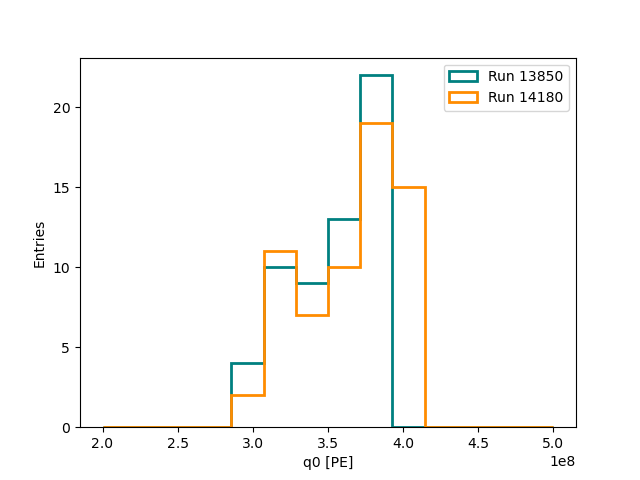

In [58]:
# plt.figure()

# Run_13850_prop_lt_filt = Run_13850_prop_lt[Run_13850_prop_lt["lt"] > 0]
# Run_14180_prop_lt_filt = Run_14180_prop_lt[Run_14180_prop_lt["lt"] > 0]

# plt.hist(Run_13850_prop_lt_filt["lt"]/1000, bins = np.linspace(4,15, 15), histtype ="step", color = "Teal", label = "Run 13850", linewidth = 2);
# plt.hist(Run_14180_prop_lt_filt["lt"]/1000, bins = np.linspace(4,15, 15), histtype ="step", color = "DarkOrange", label = "Run 14180", linewidth = 2);
# plt.legend()
# plt.xlabel("Lifetime [ms]")
# plt.ylabel("Entries")

# print("Mean LT Run 13850:", Run_13850_prop_lt_filt["lt"].mean()/1000, Run_13850_prop_lt_filt["lt"].std()/1000)
# print("Mean LT Run 14180:", Run_14180_prop_lt_filt["lt"].mean()/1000, Run_14180_prop_lt_filt["lt"].std()/1000)


# plt.figure()
# plt.hist(Run_13850_prop_lt_filt["q0"], bins = np.linspace(2e8,5e8, 15) ,histtype ="step", color = "Teal", label = "Run 13850", linewidth = 2);
# plt.hist(Run_14180_prop_lt_filt["q0"], bins = np.linspace(2e8,5e8, 15) ,histtype ="step", color = "DarkOrange", label = "Run 14180", linewidth = 2);
# plt.legend()
# plt.xlabel("q0 [PE]")
# plt.ylabel("Entries")

# print("Mean q0 Run 13850:", Run_13850_prop_lt_filt["q0"].mean()/1e8, Run_13850_prop_lt_filt["q0"].std()/1e8)
# print("Mean q0 Run 14180:", Run_14180_prop_lt_filt["q0"].mean()/1e8, Run_14180_prop_lt_filt["q0"].std()/1e8)